In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ca_3d_ebsd import *

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

=== Testing Helper Functions ===

1. Creating YAML configuration file...
Created configuration file: config_ebsd.yaml
✓ Config file created: config_ebsd.yaml

2. Creating example EBSD data...
Created example EBSD data: example_ebsd_data.csv
✓ Example EBSD data created: example_ebsd_data.csv

2. Creating example Realistic EBSD data...
Creating realistic EBSD data with 10 grains in 20x20x10 grid...
Generated grain orientations:
  Grain 0: (109.7°, 17.6°, 246.3°)
  Grain 1: (158.5°, 22.0°, 178.3°)
  Grain 2: (12.4°, 163.7°, 93.2°)
  Grain 3: (238.5°, 56.1°, 187.2°)
  Grain 4: (196.8°, 33.3°, 349.1°)
  Grain 5: (279.0°, 169.1°, 322.1°)
  Grain 6: (215.2°, 165.9°, 31.9°)
  Grain 7: (70.6°, 8.1°, 117.1°)
  Grain 8: (139.9°, 48.8°, 298.3°)
  Grain 9: (128.4°, 50.6°, 195.4°)

Saved realistic EBSD data to: realistic_ebsd_data.csv
Total cells: 4000

Grain size statistics:
  Mean size: 400.0 cells
  Min size: 192 cells
  Max size: 787 cells


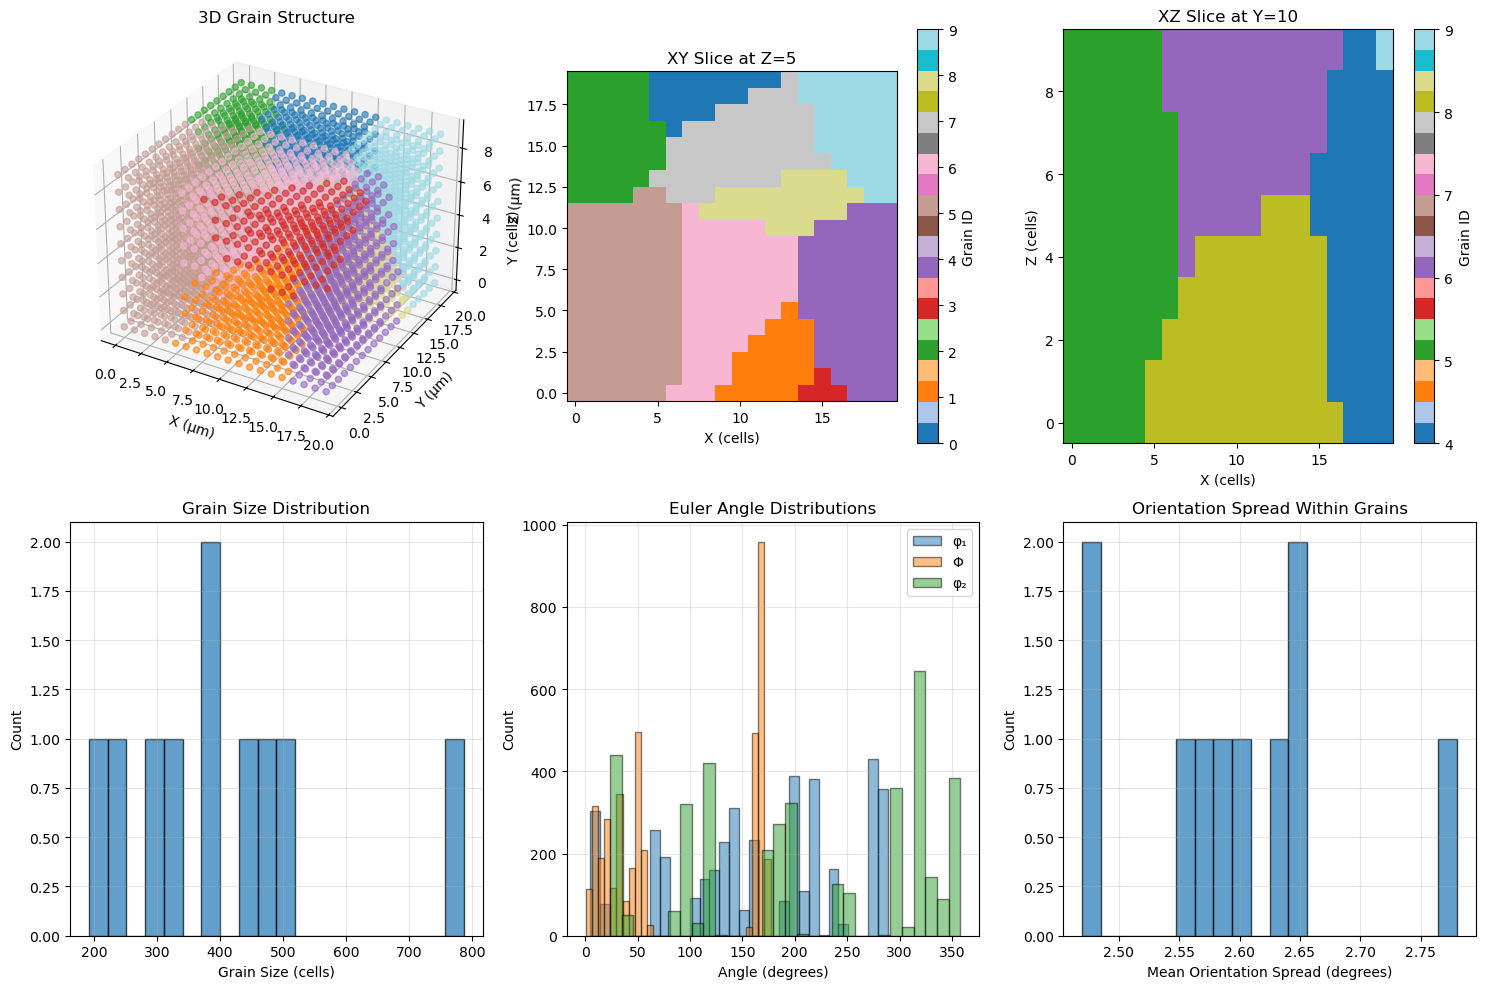

✓ Example EBSD data created: realistic_ebsd_data.csv

Example EBSD data shape: (4000, 8)
Columns: ['x', 'y', 'z', 'phi1', 'PHI', 'phi2', 'phase', 'grain_id_true']

First 5 rows:
     x    y    z        phi1         PHI        phi2  phase  grain_id_true
0  0.0  0.0  0.0  280.077657  167.886134  319.986793      1              5
1  0.0  0.0  1.0  280.946280  172.309730  325.028267      1              5
2  0.0  0.0  2.0  276.495256  168.169310  323.145416      1              5
3  0.0  0.0  3.0  281.968204  167.675356  321.582058      1              5
4  0.0  0.0  4.0  275.771052  165.566862  324.544401      1              5


In [4]:
# %% [markdown]
# ## 1. Test Helper Functions

# %% Create configuration files
print("=== Testing Helper Functions ===")
print("\n1. Creating YAML configuration file...")
create_ebsd_yaml_config()
print("✓ Config file created: config_ebsd.yaml")

print("\n2. Creating example EBSD data...")
create_example_ebsd_data()
print("✓ Example EBSD data created: example_ebsd_data.csv")

print("\n2. Creating example Realistic EBSD data...")
create_realistic_ebsd_data()
print("✓ Example EBSD data created: realistic_ebsd_data.csv")

# Load and display the example data
ebsd_df = pd.read_csv('realistic_ebsd_data.csv')
print(f"\nExample EBSD data shape: {ebsd_df.shape}")
print("Columns:", ebsd_df.columns.tolist())
print("\nFirst 5 rows:")
print(ebsd_df.head())

In [7]:
len(ebsd_df)

4000

In [6]:
# %% [markdown]
# ## 2. Test Initialization and Loading

# %% Initialize CA with EBSD data
print("\n=== Testing CA Initialization ===")
ca = CellularAutomatonRexGG3D_EBSD('config_ebsd.yaml')
print(f"✓ CA initialized successfully")
print(f"  Grid size: {ca.nx} x {ca.ny} x {ca.nz}")
print(f"  Total cells: {ca.n_cells}")
print(f"  Number of grains: {len(ca.quaternions)}")


=== Testing CA Initialization ===
Loading EBSD data from: realistic_ebsd_data.csv
Grid: 20 x 20 x 10 cells
Cell size: 1.000000 (units from EBSD data)
Converting Euler angles to quaternions...
Detecting grains from orientation data...
Calculating KAM...
Setting stored energy based on KAM values
Stored energy range: 1.00e+07 - 3.81e+08 J/m³
Detected 133 grains
Mean stored energy: 7.80e+07 J/m³
Initial boundary cells: 3939
Initialized 3D CA with grid size: 20 x 20 x 10
Total cells: 4000
Note: Using ONLY Euler angles for CA simulation (no deformation data)
✓ CA initialized successfully
  Grid size: 20 x 20 x 10
  Total cells: 4000
  Number of grains: 133


In [8]:
# %% [markdown]
# ## 3. Test Orientation Conversion Functions

# %% Test Euler to Quaternion conversion
print("\n=== Testing Orientation Conversions ===")
print("\n1. Euler to Quaternion:")
euler_angles = [(0, 0, 0), (45, 30, 15), (90, 45, 30)]
for phi1, PHI, phi2 in euler_angles:
    quat = ca.euler_to_quaternion(phi1, PHI, phi2)
    print(f"  Euler({phi1:3.0f}, {PHI:3.0f}, {phi2:3.0f}) → Quat({quat[0]:.3f}, {quat[1]:.3f}, {quat[2]:.3f}, {quat[3]:.3f})")

# %% Test Quaternion to Euler conversion


=== Testing Orientation Conversions ===

1. Euler to Quaternion:
  Euler(  0,   0,   0) → Quat(1.000, 0.000, 0.000, 0.000)
  Euler( 45,  30,  15) → Quat(0.898, 0.018, 0.285, 0.335)
  Euler( 90,  45,  30) → Quat(0.701, -0.092, 0.430, 0.561)


In [9]:
# Test extreme angles
print("\n1b. Testing extreme angles for numerical stability:")
extreme_angles = [(0, 0, 360), (360, 180, 360), (180, 90, 270)]
for phi1, PHI, phi2 in extreme_angles:
    quat = ca.euler_to_quaternion(phi1, PHI, phi2)
    norm = np.sqrt(quat[0]**2 + quat[1]**2 + quat[2]**2 + quat[3]**2)
    print(f"  Euler({phi1:3.0f}, {PHI:3.0f}, {phi2:3.0f}) → Norm = {norm:.10f}")
    assert abs(norm - 1.0) < 1e-10, f"Quaternion not normalized! Norm = {norm}"


1b. Testing extreme angles for numerical stability:
  Euler(  0,   0, 360) → Norm = 1.0000000000
  Euler(360, 180, 360) → Norm = 1.0000000000
  Euler(180,  90, 270) → Norm = 1.0000000000


In [10]:
# %% Test Quaternion to Euler conversion
print("\n2. Quaternion to Euler:")
for phi1, PHI, phi2 in euler_angles:
    quat = ca.euler_to_quaternion(phi1, PHI, phi2)
    phi1_back, PHI_back, phi2_back = ca.quaternion_to_euler(quat)
    print(f"  Quat → Euler({phi1_back:6.1f}, {PHI_back:6.1f}, {phi2_back:6.1f})")
    # Check round-trip accuracy
    error = np.sqrt((phi1-phi1_back)**2 + (PHI-PHI_back)**2 + (phi2-phi2_back)**2)
    print(f"    Round-trip error: {error:.3e} degrees")


2. Quaternion to Euler:
  Quat → Euler(   0.0,    0.0,    0.0)
    Round-trip error: 0.000e+00 degrees
  Quat → Euler( 245.9,   33.2,   73.2)
    Round-trip error: 2.091e+02 degrees
  Quat → Euler( 243.4,   52.2,   39.2)
    Round-trip error: 1.539e+02 degrees


In [11]:
# %% Test quaternion operations
print("\n3. Quaternion operations:")
q1 = (0.7071, 0.7071, 0, 0)
q2 = (0.7071, 0, 0.7071, 0)
print(f"  q1 = {q1}")
print(f"  q2 = {q2}")

q_mult = ca.quaternion_multiply(q1, q2)
print(f"  q1 * q2 = {q_mult}")

q_conj = ca.quaternion_conjugate(q1)
print(f"  conjugate(q1) = {q_conj}")


3. Quaternion operations:
  q1 = (0.7071, 0.7071, 0, 0)
  q2 = (0.7071, 0, 0.7071, 0)
  q1 * q2 = (0.49999040999999994, 0.49999040999999994, 0.49999040999999994, 0.49999040999999994)
  conjugate(q1) = (0.7071, -0.7071, 0, 0)


In [12]:
# %% [markdown]
# ## 4. Test Grid Navigation Functions

# %% Test grid navigation
print("\n=== Testing Grid Navigation ===")
test_cells = [0, 100, 250, ca.n_cells-1]

print("\n1. Cell to indices conversion:")
for cell_idx in test_cells:
    i, j, k = ca._cell_to_indices(cell_idx)
    print(f"  Cell {cell_idx:4d} → ({i}, {j}, {k})")
    # Test reverse conversion
    cell_back = ca._indices_to_cell(i, j, k)
    assert cell_back == cell_idx, f"Conversion error: {cell_idx} != {cell_back}"

print("\n2. Von Neumann neighbors (6-connectivity):")
test_cell = 250
neighbors = ca._get_neighbors(test_cell)
print(f"  Cell {test_cell} has {len(neighbors)} neighbors: {neighbors}")

print("\n3. Moore neighbors (26-connectivity):")
all_neighbors = ca._get_all_neighbors(test_cell)
print(f"  Cell {test_cell} has {len(all_neighbors)} neighbors")


=== Testing Grid Navigation ===

1. Cell to indices conversion:
  Cell    0 → (0, 0, 0)
  Cell  100 → (0, 10, 0)
  Cell  250 → (1, 5, 0)
  Cell 3999 → (19, 19, 9)

2. Von Neumann neighbors (6-connectivity):
  Cell 250 has 5 neighbors: [50, 450, 240, 260, 251]

3. Moore neighbors (26-connectivity):
  Cell 250 has 17 neighbors


In [13]:
# %% [markdown]
# ## 5. Test Misorientation Calculations

# %% Test misorientation calculations
print("\n=== Testing Misorientation Calculations ===")

# Test misorientation between quaternions
print("\n1. Direct quaternion misorientation:")
q1 = ca.euler_to_quaternion(0, 0, 0)
q2 = ca.euler_to_quaternion(10, 0, 0)
q3 = ca.euler_to_quaternion(45, 0, 0)

mis12 = ca._calculate_misorientation_from_quaternions(q1, q2)
mis13 = ca._calculate_misorientation_from_quaternions(q1, q3)
print(f"  Misorientation (0°, 0°, 0°) - (10°, 0°, 0°): {mis12:.2f}°")
print(f"  Misorientation (0°, 0°, 0°) - (45°, 0°, 0°): {mis13:.2f}°")

# Test cached misorientation between grain IDs
print("\n2. Cached grain misorientation:")
grain_pairs = [(0, 1), (0, 2), (1, 2)]
for g1, g2 in grain_pairs:
    if g1 in ca.quaternions and g2 in ca.quaternions:
        mis = ca._calculate_misorientation_quaternion(g1, g2)
        print(f"  Misorientation grain {g1} - grain {g2}: {mis:.2f}°")


=== Testing Misorientation Calculations ===

1. Direct quaternion misorientation:
  Misorientation (0°, 0°, 0°) - (10°, 0°, 0°): 10.00°
  Misorientation (0°, 0°, 0°) - (45°, 0°, 0°): 45.00°

2. Cached grain misorientation:
  Misorientation grain 0 - grain 1: 6.65°
  Misorientation grain 0 - grain 2: 5.25°
  Misorientation grain 1 - grain 2: 6.14°



=== Testing Microstructure Analysis ===

1. KAM statistics:
  Mean KAM: 16.44°
  Max KAM: 53.32°
  Min KAM: 0.00°


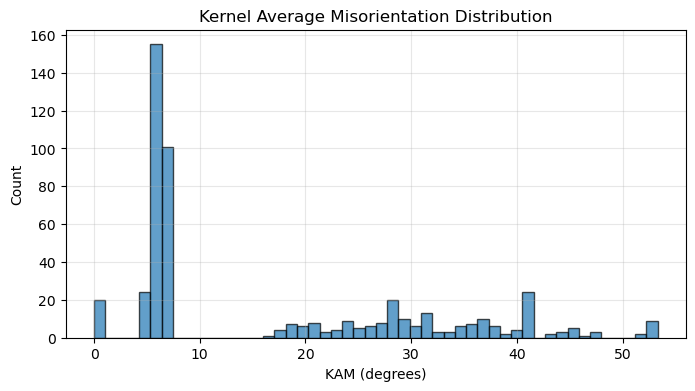

In [16]:
# %% [markdown]
# ## 6. Test Microstructure Analysis

# %% Test KAM calculation
print("\n=== Testing Microstructure Analysis ===")

print("\n1. KAM statistics:")
print(f"  Mean KAM: {np.mean(ca.kam):.2f}°")
print(f"  Max KAM: {np.max(ca.kam):.2f}°")
print(f"  Min KAM: {np.min(ca.kam):.2f}°")

# Visualize KAM distribution
plt.figure(figsize=(8, 4))
plt.hist(ca.kam, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('KAM (degrees)')
plt.ylabel('Count')
plt.title('Kernel Average Misorientation Distribution')
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
# %% Test boundary identification
print("\n2. Boundary cell identification:")
print(f"  Number of boundary cells: {len(ca.boundary_cells)}")
print(f"  Fraction of boundary cells: {len(ca.boundary_cells)/ca.n_cells:.3f}")

# %% Test boundary energy
print("\n3. Boundary energy (Read-Shockley model):")
misorientations = [0.5, 1, 2, 5, 10, 15, 20, 30, 45, 60]
for mis in misorientations:
    energy = ca._get_boundary_energy(mis)
    print(f"  {mis:4.1f}°: {energy:.3f} J/m²")


2. Boundary cell identification:
  Number of boundary cells: 3939
  Fraction of boundary cells: 0.985

3. Boundary energy (Read-Shockley model):
   0.5°: 0.000 J/m²
   1.0°: 0.124 J/m²
   2.0°: 0.201 J/m²
   5.0°: 0.350 J/m²
  10.0°: 0.468 J/m²
  15.0°: 0.500 J/m²
  20.0°: 0.500 J/m²
  30.0°: 0.500 J/m²
  45.0°: 0.500 J/m²
  60.0°: 0.500 J/m²


In [15]:
# %% [markdown]
# ## 7. Test Simulation Functions

# %% Test single simulation step
print("\n=== Testing Simulation Functions ===")

print("\n1. Initial statistics:")
stats = ca.get_statistics()
for key, value in stats.items():
    print(f"  {key}: {value}")

print("\n2. Performing single simulation step...")
max_rate = ca.calculate_reorientation_rates()
print(f"  Maximum growth rate: {max_rate:.3e}")

if max_rate > 0:
    dt, n_switched = ca.simulate_step()
    print(f"  Time step: {dt:.3e} s")
    print(f"  Cells switched: {n_switched}")

# %% [markdown]


=== Testing Simulation Functions ===

1. Initial statistics:
  n_orientations: 133
  rex_fraction: 0.0
  mean_stored_energy: 78006314.27416547
  mean_kam: 17.98066752878541
  n_boundaries: 3939
  time: 0.0
  step: 0

2. Performing single simulation step...
  Maximum growth rate: 5.754e-05
  Time step: 1.000e+00 s
  Cells switched: 0



=== Running Short Simulation ===
Running simulation with 100 steps...
Loading EBSD data from: realistic_ebsd_data.csv
Grid: 20 x 20 x 10 cells
Cell size: 1.000000 (units from EBSD data)
Converting Euler angles to quaternions...
Detecting grains from orientation data...
Calculating KAM...
Setting stored energy based on KAM values
Stored energy range: 9.55e+06 - 3.74e+08 J/m³
Detected 133 grains
Mean stored energy: 7.82e+07 J/m³
Initial boundary cells: 3939
Initialized 3D CA with grid size: 20 x 20 x 10
Total cells: 4000
Note: Using ONLY Euler angles for CA simulation (no deformation data)

Starting simulation...
Max time: 100.0s
Max steps: 100
Save interval: 25 steps
Saved EBSD format data to: test_simulation_output/step_000000_ebsd.csv
Saved initial state to test_simulation_output/step_000000.vti and test_simulation_output/step_000000_ebsd.csv
Saved EBSD format data to: test_simulation_output/step_000025_ebsd.csv
Step 25: t=25.000s, Rex=0.000, Grains=133, Elapsed=20.2s
Saved EBSD form

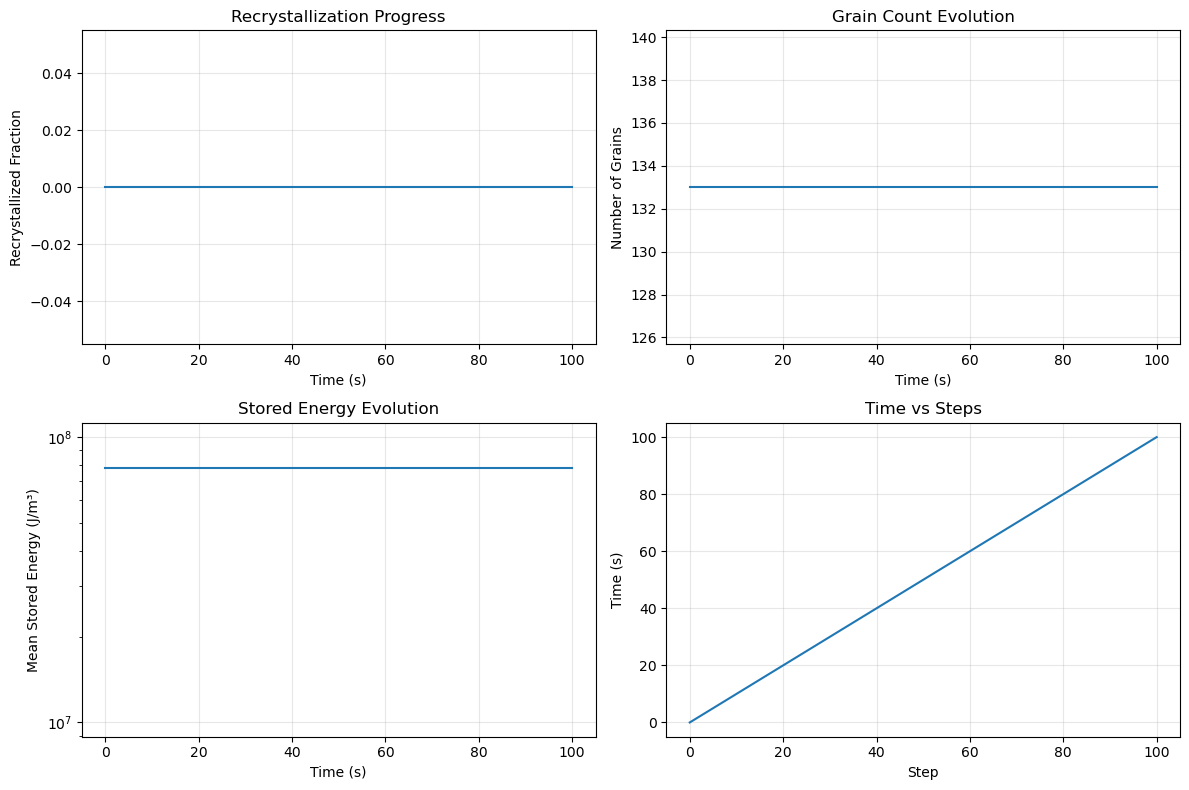


✓ All tests completed successfully!


In [16]:
# ## 10. Run Short Simulation

# %% Run a short simulation
print("\n=== Running Short Simulation ===")

# Modify config for shorter simulation
import yaml
with open('config_ebsd.yaml', 'r') as f:
    config = yaml.safe_load(f)

config['simulation']['max_steps'] = 100
config['simulation']['save_interval'] = 25
config['simulation']['output_directory'] = 'test_simulation_output'

with open('test_config.yaml', 'w') as f:
    yaml.dump(config, f)

# Run simulation
print("Running simulation with 100 steps...")
ca_test = CellularAutomatonRexGG3D_EBSD('test_config.yaml')
history = ca_test.run_simulation()

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0,0].plot(history['time'], history['rex_fraction'])
axes[0,0].set_xlabel('Time (s)')
axes[0,0].set_ylabel('Recrystallized Fraction')
axes[0,0].set_title('Recrystallization Progress')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].plot(history['time'], history['n_orientations'])
axes[0,1].set_xlabel('Time (s)')
axes[0,1].set_ylabel('Number of Grains')
axes[0,1].set_title('Grain Count Evolution')
axes[0,1].grid(True, alpha=0.3)

axes[1,0].semilogy(history['time'], history['mean_stored_energy'])
axes[1,0].set_xlabel('Time (s)')
axes[1,0].set_ylabel('Mean Stored Energy (J/m³)')
axes[1,0].set_title('Stored Energy Evolution')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].plot(history['step'], history['time'])
axes[1,1].set_xlabel('Step')
axes[1,1].set_ylabel('Time (s)')
axes[1,1].set_title('Time vs Steps')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ All tests completed successfully!")
